# Proyecto Final
### Integrantes: Jhon Rivas - Alejandro Salazar

### **1. Aplicación de línea de comandos para dotplot:**
Los estudiantes deben crear una
aplicación de línea de comandos que pueda tomar dos secuencias (en formato de archivos
FASTA) como entrada y producir un dotplot de las secuencias. La aplicación debe ser capaz
de ejecutar el dotplot de tres maneras: secuencialmente, utilizando multiprocessing,
utilizando mpi4py y utilizando pyCuda.

#### **[INPUT] Carga de Archivos FASTA**

In [1]:
#!pip install biopython

In [2]:
from Bio import SeqIO
import numpy as np
# Diccionario de mapeo
nucleotide_map = {'A': 0, 'C': 1, 'G': 2, 'T': 3, 'N' : 4}

batch = 20000 # se reduce el tamano de la informacion por limitacion computacional

# Función para leer las secuencias desde archivos FASTA
def cargar_secuencias(fasta_file):
    secuencias = []
    for record in SeqIO.parse(fasta_file, "fasta"):
        # mapear la secuencia
        mapped_seq = [nucleotide_map[nuc] for nuc in str(record.seq)]  # Mapear cada letra
        secuencias.append(mapped_seq)
    return secuencias[0]

In [3]:
# Ejemplo de cómo usar la función
fasta_file1 = "elemento1.fasta"  # Ruta al archivo FASTA de la primera secuencia
fasta_file2 = "elemento2.fasta"  # Ruta al archivo FASTA de la segunda secuencia

In [4]:
Secuencia1, Secuencia2 = cargar_secuencias(fasta_file1), cargar_secuencias(fasta_file2)

In [5]:
# Imprimir las primeras 100 bases de cada secuencia para verificar que se cargaron correctamente
print(f"Secuencia 1: {Secuencia1}")
print(f"Secuencia 2: {Secuencia2}")

Secuencia 1: [2, 0, 0, 0, 0, 1, 0, 1, 2, 3, 3, 1, 0, 3, 0, 2, 0, 0, 0, 1, 1, 3, 2, 3, 0, 3, 1, 3, 0, 0, 2, 0, 3, 3, 0, 3, 3, 3, 1, 3, 3, 2, 0, 1, 0, 1, 1, 0, 2, 0, 3, 2, 2, 0, 1, 2, 2, 0, 0, 1, 3, 1, 2, 0, 0, 1, 1, 0, 2, 2, 3, 3, 3, 3, 3, 3, 0, 0, 0, 3, 1, 0, 3, 3, 1, 3, 3, 3, 1, 0, 3, 3, 1, 1, 3, 1, 1, 3, 3, 2, 2, 3, 2, 3, 0, 1, 2, 3, 0, 3, 1, 2, 1, 3, 0, 0, 3, 0, 3, 2, 0, 0, 3, 0, 2, 1, 0, 1, 3, 1, 3, 3, 1, 1, 0, 1, 3, 2, 3, 0, 0, 2, 1, 1, 2, 0, 3, 3, 3, 2, 1, 1, 1, 0, 1, 3, 0, 1, 1, 3, 1, 2, 1, 0, 0, 0, 3, 3, 1, 3, 1, 3, 2, 1, 1, 1, 3, 0, 0, 0, 0, 0, 0, 0, 1, 1, 3, 0, 1, 0, 1, 0, 0, 1, 2, 2, 1, 2, 2, 1, 2, 3, 2, 1, 3, 0, 1, 2, 0, 1, 3, 0, 0, 1, 2, 2, 3, 3, 3, 2, 1, 0, 3, 3, 2, 2, 0, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 0, 2, 2, 1, 1, 1, 1, 2, 2, 1, 0, 0, 2, 1, 2, 2, 3, 1, 0, 3, 3, 3, 1, 0, 1, 0, 0, 1, 0, 2, 2, 1, 0, 1, 0, 1, 0, 1, 2, 1, 1, 2, 0, 3, 2, 2, 0, 1, 3, 2, 3, 3, 2, 0, 2, 2, 3, 2, 1, 2, 3, 3, 2, 2, 1, 3, 0, 3, 1, 2, 2, 0, 0, 0, 1, 2, 3, 0, 1, 0, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2,

In [6]:
Secuencia1 = Secuencia1[:batch]
Secuencia2 = Secuencia2[:batch]

#Tomo el valor del vector
secuencia1_array = np.array(Secuencia1, dtype=np.uint8)
secuencia2_array = np.array(Secuencia2, dtype=np.uint8)
#Imprimir la longitud de las secuencias
print(f"longitud Secuencia 1:", len(secuencia1_array))
print(f"longitud Secuencia 2:", len(secuencia2_array))

longitud Secuencia 1: 20000
longitud Secuencia 2: 20000


#### **[FUNCTION] Visualizar Dotplot.**

In [7]:
import matplotlib.pyplot as plt
def draw_dotplot(matrix, fig_name='dotplot_sec.svg'):
  plt.figure(figsize=(5,5))
  plt.imshow(matrix, cmap='Greys',aspect='auto')

  plt.ylabel("Secuencia 1")
  plt.xlabel("Secuencia 2")
  plt.savefig(fig_name)

#### **1.1 Realización del Dotplot Secuencial.**

In [8]:
import time
from tqdm import tqdm

times_secu = [] #Monitoreo
begin_secuencial = time.time() #Monitoreo
dotplot = np.zeros((len(secuencia1_array), len(secuencia1_array)), dtype=np.uint8)

print("La matriz de resultado tiene tamaño: ", dotplot.shape)

for i in tqdm(range(dotplot.shape[0])):
  for j in range(dotplot.shape[1]):
    if Secuencia1[i] == Secuencia2[j]:
      dotplot[i,j] = 1
    else:
      dotplot[i,j] = 0

end_secuencial = time.time() #Monitoreo
times_secu.append(end_secuencial - begin_secuencial) #Monitoreo
print(f"\n [SECUENCIAL] Con un procesador el código se ejecutó en: {end_secuencial - begin_secuencial} segundos")

La matriz de resultado tiene tamaño:  (20000, 20000)


100%|██████████| 20000/20000 [01:41<00:00, 197.59it/s]


 [SECUENCIAL] Con un procesador el código se ejecutó en: 101.23174715042114 segundos


#### **1.1.1 Visualización del Dotplot Secuencial.**

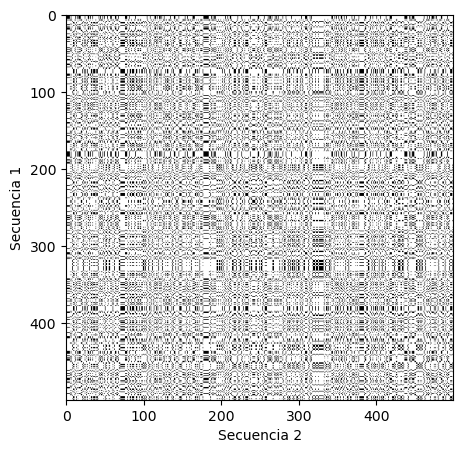

In [9]:
#Slicing del Dotplot
#Se indexa por las primeras {valor de sizeSlicing}
sizeSlicing = 500
begin_secu_imagen = time.time()  #Monitoreo
draw_dotplot(dotplot[:sizeSlicing,:sizeSlicing ],fig_name='dotplot_sec.svg')
end_secu_imagen = time.time()  #Monitoreo

#### **1.1.2 Análisis de rendimiento del Dotplot Secuencial.**

##### **1.1.2.1. Tiempos de Ejecución Totales y Parciales**

In [10]:
#Tiempo Total - Secuencial
print(f"\n [SECUENCIAL]Tiempo de Ejecución Total: {end_secuencial - begin_secuencial} segundos")


 [SECUENCIAL]Tiempo de Ejecución Total: 101.23174715042114 segundos


##### **1.1.2.2. Tiempos de Carga de los datos y generación de la imagen**

In [11]:
print(f"\n [SECUENCIAL]Tiempo de Generación de la Imagen: {end_secu_imagen - begin_secu_imagen} segundos")


 [SECUENCIAL]Tiempo de Generación de la Imagen: 0.1857895851135254 segundos


#### **1.2 Realización del Dotplot con MULTIPROCESSING.**

In [12]:
import numpy as np
import multiprocessing as mp
import matplotlib.pyplot as plt
import time

def worker(args):
    i, Secuencia1, Secuencia2 = args
    return [Secuencia1[i] == Secuencia2[j] for j in range(len(Secuencia2))]

def parallel_dotplot(Secuencia1, Secuencia2, threads=mp.cpu_count()):
    with mp.Pool(processes=threads) as pool:
        result = pool.map(worker, [(i, Secuencia1, Secuencia2) for i in range(len(Secuencia1))])
    return result

begin = time.time()
nucleosCPU = 1
dotplot = np.array(parallel_dotplot(Secuencia1, Secuencia2, nucleosCPU))

print("La matriz de resultado tiene tamaño: ", dotplot.shape)
print(f"\n [MULTIPROCESSING] Con un procesador el código se ejecutó en: {time.time() - begin} segundos")
tiempo_secuencial_multiprocessing = time.time() - begin

La matriz de resultado tiene tamaño:  (20000, 20000)

 [MULTIPROCESSING] Con un procesador el código se ejecutó en: 58.276973247528076 segundos


#### **1.2.1 Visualización del Dotplot MULTIPROCESSING.**

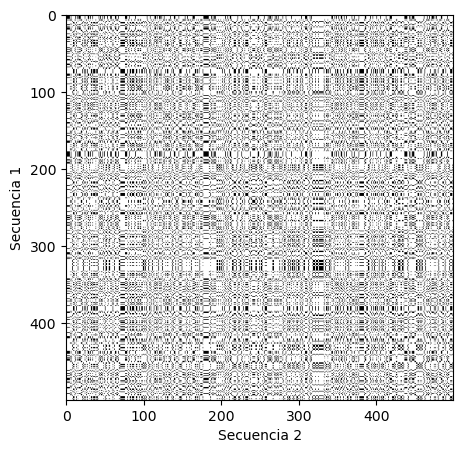

In [13]:
#Slicing del Dotplot
#Se indexa por las primeras {valor de sizeSlicing}
sizeSlicing = 500
begin_mult_imagen = time.time()  #Monitoreo
draw_dotplot(dotplot[:sizeSlicing,:sizeSlicing ],fig_name='dotplot_parallel.svg')
end_mult_imagen = time.time()  #Monitoreo


#### **1.2.2 Análisis de rendimiento del Dotplot MULTIPROCESSING.**

#### **[FUNCTION] Definición de la Función para Multiprocessing**

In [14]:
def dotplot_multiprocessing(sec1,sec2,threads=mp.cpu_count()):
  return np.array(parallel_dotplot(sec1, sec2,threads))

##### **1.2.2.1. Tiempos de Ejecución Totales y Parciales**

In [15]:
n_proc_multi = [1,2,4,6]
times_multi = []
for i in n_proc_multi:

    begin_multi = time.time()
    dotplot_multiprocessing(Secuencia1, Secuencia2,i)
    end_multi = time.time()
    times_multi.append(end_multi-begin_multi)
    print(f"\n [MULTIPROCESSING]Con: ",i, "procesadores, el tiempo de Ejecución es: " ,{end_multi - begin_multi}, "segundos")


 [MULTIPROCESSING]Con:  1 procesadores, el tiempo de Ejecución es:  {57.43933892250061} segundos

 [MULTIPROCESSING]Con:  2 procesadores, el tiempo de Ejecución es:  {47.5102162361145} segundos

 [MULTIPROCESSING]Con:  4 procesadores, el tiempo de Ejecución es:  {38.63143491744995} segundos

 [MULTIPROCESSING]Con:  6 procesadores, el tiempo de Ejecución es:  {35.207391023635864} segundos


##### **1.1.2.2. Tiempos de Carga de los datos y generación de la imagen**

In [16]:
print(f"\n [MULTIPROCESSING]Tiempo de Generación de la Imagen: {end_mult_imagen - begin_mult_imagen} segundos")


 [MULTIPROCESSING]Tiempo de Generación de la Imagen: 0.18587160110473633 segundos


##### **1.1.2.3. Aceleración y eficiencia**

In [17]:
acel_multi = [times_multi[0]/i for i in times_multi]
efic_multi = [acel_multi[i]/n_proc_multi[i] for i in range(len(n_proc_multi))]
print(f"\n [MULTIPROCESSING]Aceleración:",  acel_multi)
print(f"\n [MULTIPROCESSING]Aceleración Máxima:",  max(acel_multi))
print(f"\n [MULTIPROCESSING]Eficiencia:", efic_multi)



 [MULTIPROCESSING]Aceleración: [1.0, 1.2089892126998691, 1.4868549160868747, 1.6314568405236196]

 [MULTIPROCESSING]Aceleración Máxima: 1.6314568405236196

 [MULTIPROCESSING]Eficiencia: [1.0, 0.6044946063499346, 0.3717137290217187, 0.2719094734206033]


##### **1.1.2.4. Escalabilidad**

In [18]:
#Definición de Matrices para el analisis.
n_proc_multi = [1,2,4,6]
strong_times = []
weak_times = []

In [19]:
#Escalamiento Fuerte
for i in n_proc_multi:
    begin_multi = time.time()
    dotplot_multiprocessing(Secuencia1, Secuencia2, i)
    end_multi = time.time()
    strong_times.append(end_multi - begin_multi)
    print(f"\n [MULTIPROCESSING]Con: ",i, "procesadores, el tiempo de Ejecución es: " ,{end_multi - begin_multi}, "segundos")


 [MULTIPROCESSING]Con:  1 procesadores, el tiempo de Ejecución es:  {56.069985151290894} segundos

 [MULTIPROCESSING]Con:  2 procesadores, el tiempo de Ejecución es:  {42.375622510910034} segundos

 [MULTIPROCESSING]Con:  4 procesadores, el tiempo de Ejecución es:  {34.6992769241333} segundos

 [MULTIPROCESSING]Con:  6 procesadores, el tiempo de Ejecución es:  {36.71133279800415} segundos


In [20]:
#Escalamiento Debil
for i in n_proc_multi:
    Secuencia2Aux = Secuencia2[:len(Secuencia2)*i]  # Incrementa el tamaño de la secuencia.
    begin_multi = time.time()
    dotplot_multiprocessing(Secuencia1, Secuencia2Aux, i)
    end_multi = time.time()
    weak_times.append(end_multi - begin_multi)
    print(f"\n [MULTIPROCESSING]Con: ",i, "procesadores, el tiempo de Ejecución es: " ,{end_multi - begin_multi}, "segundos")


 [MULTIPROCESSING]Con:  1 procesadores, el tiempo de Ejecución es:  {54.876006841659546} segundos

 [MULTIPROCESSING]Con:  2 procesadores, el tiempo de Ejecución es:  {40.78957414627075} segundos

 [MULTIPROCESSING]Con:  4 procesadores, el tiempo de Ejecución es:  {35.12255024909973} segundos

 [MULTIPROCESSING]Con:  6 procesadores, el tiempo de Ejecución es:  {35.251624584198} segundos


##### **1.1.3 Graficos a partir del análisis de rendimiento del Dotplot MULTIPROCESSING.**

##### **1.1.3.1 Gráfico de desempeño.**

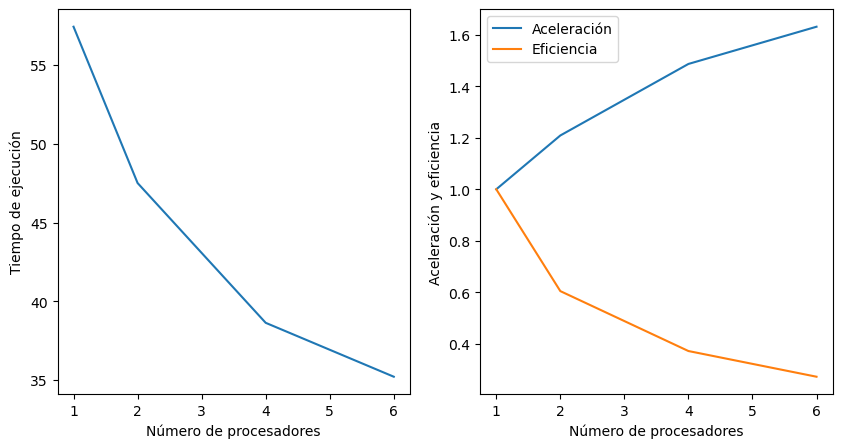

In [43]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(n_proc_multi,times_multi)
plt.xlabel("Número de procesadores")
plt.ylabel("Tiempo de ejecución")
plt.subplot(1,2,2)
plt.plot(n_proc_multi,acel_multi)
plt.plot(n_proc_multi,efic_multi)
plt.xlabel("Número de procesadores")
plt.ylabel("Aceleración y eficiencia")
plt.legend(["Aceleración","Eficiencia"])
plt.show()

##### **1.1.3.2 Gráfico de Escalamiento.**

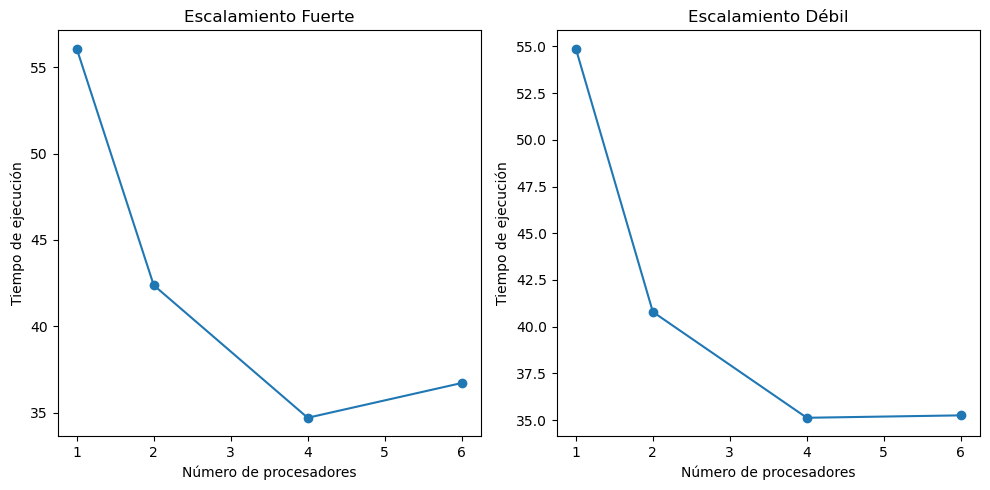

In [22]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(n_proc_multi, strong_times, marker='o')
plt.title("Escalamiento Fuerte")
plt.xlabel("Número de procesadores")
plt.ylabel("Tiempo de ejecución")

plt.subplot(1, 2, 2)
plt.plot(n_proc_multi, weak_times, marker='o')
plt.title("Escalamiento Débil")
plt.xlabel("Número de procesadores")
plt.ylabel("Tiempo de ejecución")

plt.tight_layout()
plt.show()

#### **1.3 Realización del Dotplot con MPI4PY.**

#### **1.3.1 Instalación de MPI4PY.**

In [23]:
# !apt-get update -y
# !apt-get install -y openmpi-bin libopenmpi-dev
# !pip install mpi4py

#### **1.3.2 Script MPI4PY.**

In [24]:
%%writefile dotplotMPI.py
from mpi4py import MPI
import numpy as np
import matplotlib.pyplot as plt
import time
from Bio import SeqIO
import numpy as np
# Diccionario de mapeo
begin_data = time.time()

nucleotide_map = {'A': 0, 'C': 1, 'G': 2, 'T': 3, 'N' : 4}

batch = 20000 # se reduce el tamano de la informacion por limitacion computacional

# Función para leer las secuencias desde archivos FASTA
def cargar_secuencias(fasta_file):
    secuencias = []
    for record in SeqIO.parse(fasta_file, "fasta"):
        # mapear la secuencia
        mapped_seq = [nucleotide_map[nuc] for nuc in str(record.seq)]  # Mapear cada letra
        secuencias.append(mapped_seq)
    return secuencias[0]

# Ejemplo de cómo usar la función
fasta_file1 = "elemento1.fasta"  # Ruta al archivo FASTA de la primera secuencia
fasta_file2 = "elemento2.fasta"  # Ruta al archivo FASTA de la segunda secuencia

Secuencia1, Secuencia2 = cargar_secuencias(fasta_file1), cargar_secuencias(fasta_file2)

Secuencia1 = Secuencia1[:batch]
Secuencia2 = Secuencia2[:batch]

#Tomo el valor del vector
secuencia1_array = np.array(Secuencia1, dtype=np.uint8)
secuencia2_array = np.array(Secuencia2, dtype=np.uint8)
#Imprimir la longitud de las secuencias
print(f"longitud Secuencia 1:", len(secuencia1_array))
print(f"longitud Secuencia 2:", len(secuencia2_array))

end_data =  time.time()
 
print(f"\n La carga de información tardó: {end_data-begin_data} segundos")

begin = time.time()

comm = MPI.COMM_WORLD
rank = comm.Get_rank()
size = comm.Get_size()

#[TEST] Definimos unas secuencias
# Estas secuencias se deben reemplazar con las que ingresan por FASTA

Secuencia1 = secuencia1_array
Secuencia2 = secuencia2_array

# # Generar las secuencias mapeadas
# Secuencia1 = np.array([nucleotide_map[char] for char in "ACGTCGTCGAGCTAGCATCGATCAGNNNCATCATCNACTATACNNNNCATCATCATCTACTGCTACGACTACGAGAGAGCTACGACTACG" * cant_muestras], dtype=np.uint8)
# Secuencia2 = np.array([nucleotide_map[char] for char in "NGCNATCACGATGCATGCACTACGATCGACAGCATCGATCGATGCATCATGCATCGNATGCNTGASCSATCGACGTANGCACTGACNTGA" * cant_muestras], dtype=np.uint8)

# Dividir índices en chunks para cada proceso
chunks = np.array_split(range(len(Secuencia1)), size)
local_chunk = chunks[rank]

# Crear matriz dotplot local
dotplot_local = np.zeros((len(local_chunk), len(Secuencia2)), dtype=np.uint8)

# Generar el dotplot local
for i, idx in enumerate(local_chunk):
    for j in range(len(Secuencia2)):
        dotplot_local[i, j] = 1 if Secuencia1[idx] == Secuencia2[j] else 0

# Reunir resultados en el proceso root
dotplot = comm.gather(dotplot_local, root=0)

# Combinar los resultados en una sola matriz
merged_data = np.vstack(dotplot)

# Tiempo final y visualización
end = time.time()
print(f"\n[MPI4PY] Con un nodo el código se ejecutó en: {end - begin} segundos")

plt.figure(figsize=(5, 5))
plt.imshow(merged_data, cmap='Greys', aspect='auto')
plt.ylabel("Secuencia 1")
plt.xlabel("Secuencia 2")
plt.savefig("dotplot_mpi4py.svg")

Overwriting dotplotMPI.py


#### **1.3.3 Ejecución del Script con MPI4PY.**

In [25]:
#n indica el número de procesos
!mpirun --allow-run-as-root -n 1 python dotplotMPI.py

longitud Secuencia 1: 20000
longitud Secuencia 2: 20000

 La carga de información tardó: 0.037023067474365234 segundos

[MPI4PY] Con un nodo el código se ejecutó en: 163.491464138031 segundos


#### **1.3.4 Visualización del Dotplot MPI4PY.**

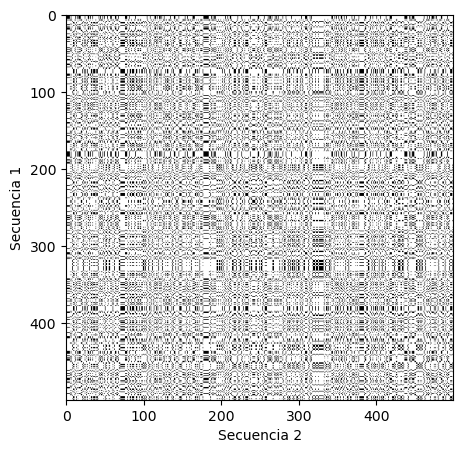

In [26]:
import time
sizeSlicing = 500

begin_mpi4py_imagen = time.time()  #Monitoreo
draw_dotplot(dotplot[:sizeSlicing,:sizeSlicing ],fig_name='dotplot_mpi4py.svg')
end_mpi4py_imagen = time.time()  #Monitoreo

#### **1.3.5 Análisis de rendimiento del Dotplot MPI4PY.**

#### **[FUNCTION] Definición de la Función para MPI4PY**

In [27]:
%%writefile dotplotMPIPerformance.py
from mpi4py import MPI
import numpy as np
import matplotlib.pyplot as plt
import time
from Bio import SeqIO
import numpy as np
# Diccionario de mapeo
begin_data = time.time()

nucleotide_map = {'A': 0, 'C': 1, 'G': 2, 'T': 3, 'N' : 4}

batch = 20000 # se reduce el tamano de la informacion por limitacion computacional

# Función para leer las secuencias desde archivos FASTA
def cargar_secuencias(fasta_file):
    secuencias = []
    for record in SeqIO.parse(fasta_file, "fasta"):
        # mapear la secuencia
        mapped_seq = [nucleotide_map[nuc] for nuc in str(record.seq)]  # Mapear cada letra
        secuencias.append(mapped_seq)
    return secuencias[0]

# Ejemplo de cómo usar la función
fasta_file1 = "elemento1.fasta"  # Ruta al archivo FASTA de la primera secuencia
fasta_file2 = "elemento2.fasta"  # Ruta al archivo FASTA de la segunda secuencia

Secuencia1, Secuencia2 = cargar_secuencias(fasta_file1), cargar_secuencias(fasta_file2)

Secuencia1 = Secuencia1[:batch]
Secuencia2 = Secuencia2[:batch]

#Tomo el valor del vector
secuencia1_array = np.array(Secuencia1, dtype=np.uint8)
secuencia2_array = np.array(Secuencia2, dtype=np.uint8)
#Imprimir la longitud de las secuencias


end_data =  time.time()
 
print(f"\n La carga de información tardó: {end_data-begin_data} segundos")

comm = MPI.COMM_WORLD
rank = comm.Get_rank()
size = comm.Get_size()


# Estas secuencias se deben reemplazar con las que ingresan por FASTA
Secuencia1 = secuencia1_array
Secuencia2 = secuencia2_array

# # Generar las secuencias mapeadas
# Secuencia1 = np.array([nucleotide_map[char] for char in "ACGTCGTCGAGCTAGCATCGATCAGNNNCATCATCNACTATACNNNNCATCATCATCTACTGCTACGACTACGAGAGAGCTACGACTACG" * cant_muestras], dtype=np.uint8)
# Secuencia2 = np.array([nucleotide_map[char] for char in "NGCNATCACGATGCATGCACTACGATCGACAGCATCGATCGATGCATCATGCATCGNATGCNTGASCSATCGACGTANGCACTGACNTGA" * cant_muestras], dtype=np.uint8)

# Dividir índices en chunks para cada proceso
chunks = np.array_split(range(len(Secuencia1)), size)
local_chunk = chunks[rank]

print(f"El proceso {rank} tiene {len(chunks[rank])} elementos")

# Crear matriz dotplot local
dotplot_local = np.zeros((len(local_chunk), len(Secuencia2)), dtype=np.uint8)

# Generar el dotplot local
for i, idx in enumerate(local_chunk):
    for j in range(len(Secuencia2)):
        dotplot_local[i, j] = 1 if Secuencia1[idx] == Secuencia2[j] else 0

# Reunir resultados en el proceso root
dotplot = comm.gather(dotplot_local, root=0)

if rank == 0:
    # Combinar los resultados en una sola matriz
    merged_data = np.vstack(dotplot)

    plt.figure(figsize=(5, 5))
    plt.imshow(merged_data, cmap='Greys', aspect='auto')
    plt.ylabel("Secuencia 1")
    plt.xlabel("Secuencia 2")
    plt.savefig("dotplot_mpi4py.svg")

Overwriting dotplotMPIPerformance.py


##### **1.3.5.1. Tiempos de Ejecución Totales y Parciales**

In [28]:
#Definición de Matrices para el analisis.
n_proc_mpi4py = [1,2,4,6]
mpi4py_times = []
strong_times_mpi4py = []
weak_times_mpi4py = []

In [29]:
#n Analisis con 1 Nodo
i = 1
begin_mpi4py = time.time()
!mpirun --allow-run-as-root -n 1 python dotplotMPIPerformance.py
end_mpi4py = time.time()
mpi4py_times.append(end_mpi4py - begin_mpi4py)
strong_times_mpi4py.append(end_mpi4py - begin_mpi4py)
print(f"\n [MPI4PY]Con: ",i, "Nodo, el tiempo de Ejecución es: " ,{end_mpi4py - begin_mpi4py}, "segundos")


 La carga de información tardó: 0.02877068519592285 segundos
El proceso 0 tiene 20000 elementos

 [MPI4PY]Con:  1 Nodo, el tiempo de Ejecución es:  {220.87083458900452} segundos


In [30]:
#n Analisis con 2 Nodos
i = 2
begin_mpi4py = time.time()
!mpirun --allow-run-as-root -n 2 python dotplotMPIPerformance.py
end_mpi4py = time.time()
mpi4py_times.append(end_mpi4py - begin_mpi4py)
strong_times_mpi4py.append(end_mpi4py - begin_mpi4py)
print(f"\n [MPI4PY]Con: ",i, "Nodo(s), el tiempo de Ejecución es: " ,{end_mpi4py - begin_mpi4py}, "segundos")


 La carga de información tardó: 0.06515812873840332 segundos
El proceso 0 tiene 10000 elementos

 La carga de información tardó: 0.07124018669128418 segundos
El proceso 1 tiene 10000 elementos

 [MPI4PY]Con:  2 Nodo(s), el tiempo de Ejecución es:  {205.64088129997253} segundos


In [31]:
#n Analisis con 4 Nodos
i = 4
begin_mpi4py = time.time()
!mpirun --allow-run-as-root -n 4 python dotplotMPIPerformance.py
end_mpi4py = time.time()
mpi4py_times.append(end_mpi4py - begin_mpi4py)
strong_times_mpi4py.append(end_mpi4py - begin_mpi4py)
print(f"\n [MPI4PY]Con: ",i, "Nodo(s), el tiempo de Ejecución es: " ,{end_mpi4py - begin_mpi4py}, "segundos")


 La carga de información tardó: 0.07542133331298828 segundos

 La carga de información tardó: 0.0667428970336914 segundos

 La carga de información tardó: 0.07632851600646973 segundos
El proceso 1 tiene 5000 elementos
El proceso 0 tiene 5000 elementos

 La carga de información tardó: 0.07142114639282227 segundos
El proceso 3 tiene 5000 elementos
El proceso 2 tiene 5000 elementos

 [MPI4PY]Con:  4 Nodo(s), el tiempo de Ejecución es:  {119.33210253715515} segundos


In [32]:
#n Analisis con 6 Nodos
i = 6
begin_mpi4py = time.time()
!mpirun --allow-run-as-root -n 6 python dotplotMPIPerformance.py
end_mpi4py = time.time()
mpi4py_times.append(end_mpi4py - begin_mpi4py)
strong_times_mpi4py.append(end_mpi4py - begin_mpi4py)
print(f"\n [MPI4PY]Con: ",i, "Nodo(s), el tiempo de Ejecución es: " ,{end_mpi4py - begin_mpi4py}, "segundos")


 La carga de información tardó: 0.0855710506439209 segundos
El proceso 3 tiene 3333 elementos

 La carga de información tardó: 0.12900066375732422 segundos
El proceso 5 tiene 3333 elementos

 La carga de información tardó: 0.13545870780944824 segundos
El proceso 0 tiene 3334 elementos

 La carga de información tardó: 0.13128662109375 segundos
El proceso 1 tiene 3334 elementos

 La carga de información tardó: 0.18380451202392578 segundos
El proceso 4 tiene 3333 elementos

 La carga de información tardó: 0.2545614242553711 segundos
El proceso 2 tiene 3333 elementos

 [MPI4PY]Con:  6 Nodo(s), el tiempo de Ejecución es:  {110.66779136657715} segundos


##### **1.3.5.2. Tiempos de Carga de los datos y generación de la imagen**

In [33]:
print(f"\n [MPI4PY]Tiempo de Generación de la Imagen: {end_mpi4py_imagen - begin_mpi4py_imagen} segundos")


 [MPI4PY]Tiempo de Generación de la Imagen: 0.1903693675994873 segundos


##### **1.3.5.3. Aceleración y eficiencia**

In [34]:
print(mpi4py_times)

[220.87083458900452, 205.64088129997253, 119.33210253715515, 110.66779136657715]


In [35]:
acel_mpi4py = [mpi4py_times[0]/i for i in mpi4py_times]
efic_mpi4py = [acel_mpi4py[i]/n_proc_mpi4py[i] for i in range(len(n_proc_mpi4py))]
print(f"\n [MPI4PY]Aceleración:",  acel_mpi4py)
print(f"\n [MPI4PY]Aceleración Máxima:",  max(acel_mpi4py))
print(f"\n [MPI4PY]Eficiencia:", efic_mpi4py)


 [MPI4PY]Aceleración: [1.0, 1.0740609220927027, 1.8508920055291438, 1.995800511256158]

 [MPI4PY]Aceleración Máxima: 1.995800511256158

 [MPI4PY]Eficiencia: [1.0, 0.5370304610463513, 0.46272300138228595, 0.332633418542693]


##### **1.3.5.4. Escalabilidad**

#### **[FUNCTION] Definición de la Función para MPI4PY - Escalamiento Débil**

In [36]:
%%writefile dotplotMPISCLWeak.py
from mpi4py import MPI
import numpy as np
import matplotlib.pyplot as plt
import time
from Bio import SeqIO

begin_data = time.time()

nucleotide_map = {'A': 0, 'C': 1, 'G': 2, 'T': 3, 'N' : 4}

batch = 20000 # se reduce el tamano de la informacion por limitacion computacional

# Función para leer las secuencias desde archivos FASTA
def cargar_secuencias(fasta_file):
    secuencias = []
    for record in SeqIO.parse(fasta_file, "fasta"):
        # mapear la secuencia
        mapped_seq = [nucleotide_map[nuc] for nuc in str(record.seq)]  # Mapear cada letra
        secuencias.append(mapped_seq)
    return secuencias[0]

# Ejemplo de cómo usar la función
fasta_file1 = "elemento1.fasta"  # Ruta al archivo FASTA de la primera secuencia
fasta_file2 = "elemento2.fasta"  # Ruta al archivo FASTA de la segunda secuencia

Secuencia1, Secuencia2 = cargar_secuencias(fasta_file1), cargar_secuencias(fasta_file2)

Secuencia1 = Secuencia1[:batch]
Secuencia2 = Secuencia2[:batch]

#Tomo el valor del vector
secuencia1_array = np.array(Secuencia1, dtype=np.uint8)
secuencia2_array = np.array(Secuencia2, dtype=np.uint8)
#Imprimir la longitud de las secuencias


end_data =  time.time()
 
print(f"\n La carga de información tardó: {end_data-begin_data} segundos")



begin = time.time()

comm = MPI.COMM_WORLD
rank = comm.Get_rank()
size = comm.Get_size()

#[TEST] Definimos unas secuencias
# Estas secuencias se deben reemplazar con las que ingresan por FASTA
# cant_muestras = 150
# Secuencia1 = "ACGTCGTCGAGCTAGCATCGATCAGNNNCATCATCNACTATACNNNNCATCATCATCTACTGCTACGACTACGAGAGAGCTACGACTACG"*cant_muestras
# Secuencia2 = "NGCNATCACGATGCATGCACTACGATCGACAGCATCGATCGATGCATCATGCATCGNATGCNTGASCSATCGACGTANGCACTGACNTGA"*cant_muestras
# Estas secuencias se deben reemplazar con las que ingresan por FASTA
Secuencia1 = secuencia1_array
Secuencia2 = secuencia2_array


#Escalamiento Débil
Secuencia2Aux = Secuencia2[:len(Secuencia2)*size]  # Incrementa el tamaño de la secuencia.

# Dividir la secuencia1 en chunks, uno por cada proceso.
chunks = np.array_split(range(len(Secuencia1)), size)
print(f"El proceso {rank} tiene {len(chunks[rank])} elementos")


dotplot = np.empty([len(chunks[rank]),len(Secuencia2Aux)],dtype=np.uint8)

for i in range(len(chunks[rank])):
    for j in range(len(Secuencia2Aux)):
        if Secuencia1[chunks[rank][i]] == Secuencia2Aux[j]:
            dotplot[i,j] = np.uint8(1)
        else:
            dotplot[i,j] = np.uint8(0)

# gather data from all processes onto the root process
dotplot = comm.gather(dotplot, root=0)

# The root process prints the results and generates the plot.
if rank == 0:
    #print("La matriz de resultado tiene tamaño: ", dotplot.shape)

    # merge the gathered data into a single array
    merged_data = np.vstack(dotplot)


    end = time.time()

Overwriting dotplotMPISCLWeak.py


In [37]:
#n Analisis con 1 Nodo
i = 1
begin_mpi4py = time.time()
!mpirun --allow-run-as-root -n 1 python dotplotMPISCLWeak.py
end_mpi4py = time.time()
weak_times_mpi4py.append(end_mpi4py - begin_mpi4py)
print(f"\n [MPI4PY]Con: ",i, "Nodo, el tiempo de Ejecución es: " ,{end_mpi4py - begin_mpi4py}, "segundos")


 La carga de información tardó: 0.062148094177246094 segundos
El proceso 0 tiene 20000 elementos

 [MPI4PY]Con:  1 Nodo, el tiempo de Ejecución es:  {743.0506873130798} segundos


In [38]:
#n Analisis con 2 Nodo
i = 2
begin_mpi4py = time.time()
!mpirun --allow-run-as-root -n 2 python dotplotMPISCLWeak.py
end_mpi4py = time.time()
weak_times_mpi4py.append(end_mpi4py - begin_mpi4py)
print(f"\n [MPI4PY]Con: ",i, "Nodo, el tiempo de Ejecución es: " ,{end_mpi4py - begin_mpi4py}, "segundos")


 La carga de información tardó: 0.029578685760498047 segundos
El proceso 1 tiene 10000 elementos

 La carga de información tardó: 0.030918359756469727 segundos
El proceso 0 tiene 10000 elementos

 [MPI4PY]Con:  2 Nodo, el tiempo de Ejecución es:  {179.15939474105835} segundos


In [39]:
#n Analisis con 4 Nodo
i = 4
begin_mpi4py = time.time()
!mpirun --allow-run-as-root -n 4 python dotplotMPISCLWeak.py
end_mpi4py = time.time()
weak_times_mpi4py.append(end_mpi4py - begin_mpi4py)
print(f"\n [MPI4PY]Con: ",i, "Nodo, el tiempo de Ejecución es: " ,{end_mpi4py - begin_mpi4py}, "segundos")


 La carga de información tardó: 0.0414431095123291 segundos
El proceso 3 tiene 5000 elementos

 La carga de información tardó: 0.043891191482543945 segundos
El proceso 2 tiene 5000 elementos

 La carga de información tardó: 0.09154295921325684 segundos
El proceso 0 tiene 5000 elementos

 La carga de información tardó: 0.1361086368560791 segundos
El proceso 1 tiene 5000 elementos

 [MPI4PY]Con:  4 Nodo, el tiempo de Ejecución es:  {126.75746655464172} segundos


In [40]:
#n Analisis con 6 Nodo
i = 6
begin_mpi4py = time.time()
!mpirun --allow-run-as-root -n 6 python dotplotMPISCLWeak.py
end_mpi4py = time.time()
weak_times_mpi4py.append(end_mpi4py - begin_mpi4py)
print(f"\n [MPI4PY]Con: ",i, "Nodo, el tiempo de Ejecución es: " ,{end_mpi4py - begin_mpi4py}, "segundos")


 La carga de información tardó: 0.05345797538757324 segundos

 La carga de información tardó: 0.047350406646728516 segundos
El proceso 5 tiene 3333 elementos
El proceso 3 tiene 3333 elementos

 La carga de información tardó: 0.06624245643615723 segundos
El proceso 1 tiene 3334 elementos

 La carga de información tardó: 0.06558728218078613 segundos
El proceso 2 tiene 3333 elementos

 La carga de información tardó: 0.19873428344726562 segundos
El proceso 4 tiene 3333 elementos

 La carga de información tardó: 0.20620465278625488 segundos
El proceso 0 tiene 3334 elementos

 [MPI4PY]Con:  6 Nodo, el tiempo de Ejecución es:  {98.34345865249634} segundos


##### **1.3.6 Graficos a partir del análisis de rendimiento del Dotplot MPI4PY.**

##### **1.3.6.1 Gráfico de desempeño.**

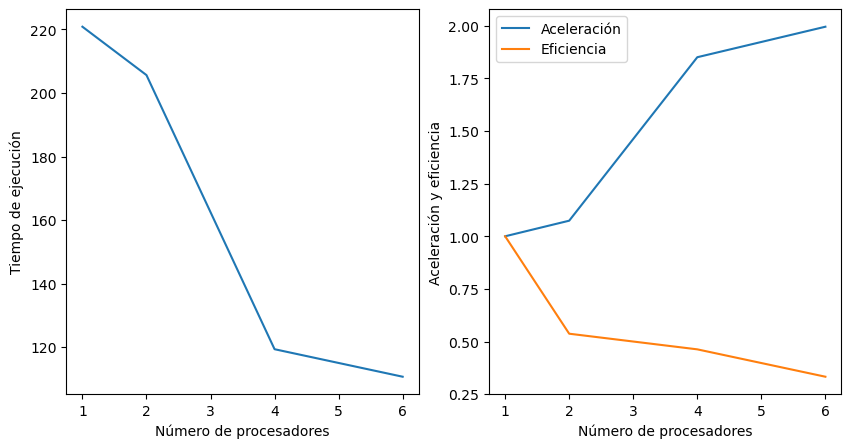

In [41]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(n_proc_mpi4py,mpi4py_times)
plt.xlabel("Número de procesadores")
plt.ylabel("Tiempo de ejecución")
plt.subplot(1,2,2)
plt.plot(n_proc_mpi4py,acel_mpi4py)
plt.plot(n_proc_mpi4py,efic_mpi4py)
plt.xlabel("Número de procesadores")
plt.ylabel("Aceleración y eficiencia")
plt.legend(["Aceleración","Eficiencia"])
plt.show()

##### **1.3.6.2 Gráfico de Escalamiento.**

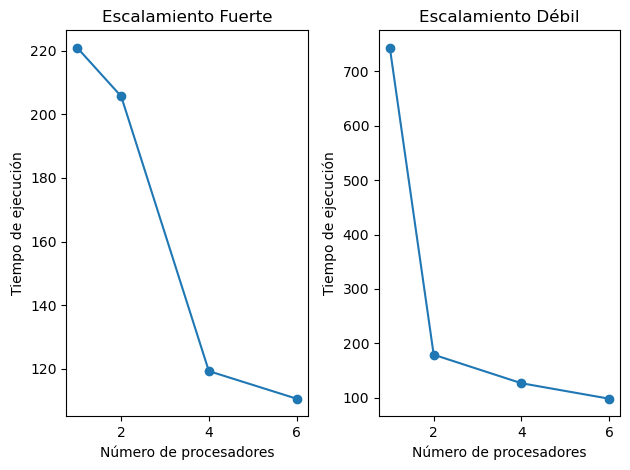

In [42]:
plt.subplot(1, 2, 1)
plt.plot(n_proc_mpi4py, strong_times_mpi4py, marker='o')
plt.title("Escalamiento Fuerte")
plt.xlabel("Número de procesadores")
plt.ylabel("Tiempo de ejecución")

plt.subplot(1, 2, 2)
plt.plot(n_proc_mpi4py, weak_times_mpi4py, marker='o')
plt.title("Escalamiento Débil")
plt.xlabel("Número de procesadores")
plt.ylabel("Tiempo de ejecución")

plt.tight_layout()
plt.show()